In [14]:
import pandas as pd
import glob
from natsort import natsorted
from tqdm import tqdm
import numpy as np
import re
import warnings
import os
warnings.filterwarnings('ignore')

# read fc time course:
input_dir = "data_fmri_time_course_conn_common_mask/"
# input_dir2 = "data_fmri_time_course_target/"

output_dir = "out03_functional_connectivity_conn_hc_common_mask/"

if not os.path.isdir(output_dir):
    os.mkdir(output_dir)

files_seed = natsorted(glob.glob(input_dir + "time_course_??HC*.txt"))
files_target = natsorted(glob.glob(input_dir + "time_course_target_??HC*.txt"))

df_connectivity = pd.DataFrame({
    'files_seed': files_seed,
    'files_target': files_target,
    'subject_id': [int(x[-8:-4]) for x in files_seed],
    'group': [re.findall("TEHC|NTHC", x)[0] for x in files_seed],
})

df1 = pd.read_csv(files_seed[0], sep = '\t')
df1.pop(df1.columns[-1])
seed_list = list(df1.columns)
seed_list = ['_'.join(x.split('_')[1:]) for x in seed_list]
print(seed_list)
print(len(seed_list))

df2 = pd.read_csv(files_target[0], sep = '\t')
df2.pop(df2.columns[-1])
target_list = list(df2.columns)
target_list = ['_'.join(x.split('_')[1:]) for x in target_list]
print(target_list)
print(len(target_list))

# calculate pearson correlation between seed and target regions:
for seed in df1:
    for target in df2:
        col_label = '_'.join(seed.split('_')[1:]) + '*' + '_'.join(target.split('_')[1:])
        df_connectivity[col_label] = np.nan
    
# select subjects identifed in script01_organize_subject_info:
df_life_time_mdd = pd.read_csv('out02_img_file_info_nts_tms_response.csv')

df_hc = pd.read_csv('out02_img_file_info_hc_tms_response.csv')

# # df_nthc = pd.read_csv('out02_img_file_info_nthc_tms_response_zscore.csv')
# df_nthc = pd.read_csv('out02_img_file_info_hc_tms_response_zscore_gm.3.csv')

subject_selected = list(df_hc['subject_id'].unique()) + list(df_life_time_mdd['subject_id'])
df_connectivity  = df_connectivity.loc[df_connectivity['subject_id'].isin(subject_selected), :]
# df_connectivity


['L_aMFG_10-6mm', 'L_aMFG_10mm', 'L_aMFG_14-10mm', 'L_aMFG_14mm', 'L_aMFG_6mm', 'L_pMFG_10-6mm', 'L_pMFG_10mm', 'L_pMFG_14-10mm', 'L_pMFG_14mm', 'L_pMFG_6mm', 'R_aMFG_10-6mm', 'R_aMFG_10mm', 'R_aMFG_14-10mm', 'R_aMFG_14mm', 'R_aMFG_6mm', 'R_FEF_10-6mm', 'R_FEF_10mm', 'R_FEF_14-10mm', 'R_FEF_14mm', 'R_FEF_6mm', 'R_IFJ_10-6mm', 'R_IFJ_10mm', 'R_IFJ_14-10mm', 'R_IFJ_14mm', 'R_IFJ_6mm', 'R_IPL_10-6mm', 'R_IPL_10mm', 'R_IPL_14-10mm', 'R_IPL_14mm', 'R_IPL_6mm', 'R_M1_10-6mm', 'R_M1_10mm', 'R_M1_14-10mm', 'R_M1_14mm', 'R_M1_6mm', 'R_pMFG_10-6mm', 'R_pMFG_10mm', 'R_pMFG_14-10mm', 'R_pMFG_14mm', 'R_pMFG_6mm', 'R_preSMA_10-6mm', 'R_preSMA_10mm', 'R_preSMA_14-10mm', 'R_preSMA_14mm', 'R_preSMA_6mm']
45
['dACC_10mm', 'dACC_6mm', 'FIRST_B_amyg_small', 'FIRST_L_amyg_small', 'FIRST_R_amyg_small', 'l-dACC_MNI152_2mm', 'r-dACC_MNI152_2mm', 'sgACC_6_16_-10_10mm']
8


In [15]:
df_connectivity.head()

,files_seed,files_target,subject_id,group,L_aMFG_10-6mm*dACC_10mm,L_aMFG_10-6mm*dACC_6mm,L_aMFG_10-6mm*FIRST_B_amyg_small,L_aMFG_10-6mm*FIRST_L_amyg_small,L_aMFG_10-6mm*FIRST_R_amyg_small,L_aMFG_10-6mm*l-dACC_MNI152_2mm,...,R_preSMA_14mm*r-dACC_MNI152_2mm,R_preSMA_14mm*sgACC_6_16_-10_10mm,R_preSMA_6mm*dACC_10mm,R_preSMA_6mm*dACC_6mm,R_preSMA_6mm*FIRST_B_amyg_small,R_preSMA_6mm*FIRST_L_amyg_small,R_preSMA_6mm*FIRST_R_amyg_small,R_preSMA_6mm*l-dACC_MNI152_2mm,R_preSMA_6mm*r-dACC_MNI152_2mm,R_preSMA_6mm*sgACC_6_16_-10_10mm
0,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,1001,NTHC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,1003,NTHC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,1009,NTHC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,1015,NTHC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,1016,NTHC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
    
for i in tqdm(range(len(df_connectivity.index))):
    df1 = pd.read_csv(df_connectivity.iloc[i, 0], sep = '\t')
    df1.pop(df1.columns[-1])
#     col_list = list(df1.columns)
#     df1.columns = ['_'.join(x.split('_')[1:]) for x in col_list]
    
    df2 = pd.read_csv(df_connectivity.iloc[i, 1], sep = '\t')
    df2.pop(df2.columns[-1])
#     col_list = list(df2.columns)
#     df2.columns = ['_'.join(x.split('_')[1:]) for x in col_list]
    corr = []
    
#     for seed_target in list(df_connectivity.columns)[5:]:
#         seed = seed_target.split('*')[0]
#         target = seed_target.split('*')[1]
    for seed in df1:
        for target in df2:
            corr.append(np.corrcoef(df1[seed].values, df2[target].values)[0][1])
        
    df_connectivity.iloc[i, 4:] = corr

df_connectivity.to_csv(output_dir + 'out03_functional_connectivity.csv', index = None)

100%|███████████████████████████████████████████| 81/81 [00:12<00:00,  6.39it/s]


In [17]:
len(corr)

360

In [18]:
df_connectivity.head()

,files_seed,files_target,subject_id,group,L_aMFG_10-6mm*dACC_10mm,L_aMFG_10-6mm*dACC_6mm,L_aMFG_10-6mm*FIRST_B_amyg_small,L_aMFG_10-6mm*FIRST_L_amyg_small,L_aMFG_10-6mm*FIRST_R_amyg_small,L_aMFG_10-6mm*l-dACC_MNI152_2mm,...,R_preSMA_14mm*r-dACC_MNI152_2mm,R_preSMA_14mm*sgACC_6_16_-10_10mm,R_preSMA_6mm*dACC_10mm,R_preSMA_6mm*dACC_6mm,R_preSMA_6mm*FIRST_B_amyg_small,R_preSMA_6mm*FIRST_L_amyg_small,R_preSMA_6mm*FIRST_R_amyg_small,R_preSMA_6mm*l-dACC_MNI152_2mm,R_preSMA_6mm*r-dACC_MNI152_2mm,R_preSMA_6mm*sgACC_6_16_-10_10mm
0,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,1001,NTHC,0.281359,0.309678,0.129364,-0.055299,0.241221,0.430419,...,0.419588,-0.076319,0.001888,-0.004382,0.047947,0.058444,0.021170,0.400436,0.370069,-0.120489
1,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,1003,NTHC,0.422950,0.418957,0.237252,0.377134,0.101693,0.249576,...,0.300211,-0.268232,0.097649,0.083379,0.152144,0.080677,0.174734,0.405796,0.302960,-0.204967
2,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,1009,NTHC,0.356106,0.397339,-0.067449,-0.175831,0.033796,0.554173,...,0.077380,-0.162466,-0.429917,-0.386728,0.092395,0.160955,0.019134,-0.238393,-0.203110,-0.123607
4,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,1015,NTHC,0.348995,0.363349,-0.133306,-0.175067,-0.094191,0.535792,...,0.658168,-0.215604,0.382494,0.416421,-0.016924,-0.060347,0.014363,0.493864,0.567605,-0.220797
5,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,1016,NTHC,0.163444,0.203982,0.086387,0.083215,0.073087,0.276643,...,0.406157,0.191281,-0.223942,-0.285239,0.013885,0.047589,-0.023323,0.266937,0.323090,0.089582


In [19]:
# fisher z transform FC (pearson's correlation)

# import re
import pandas as pd

df_connectivity = pd.read_csv(output_dir + 'out03_functional_connectivity.csv')

def fisher_z(r):
    return .5*(np.log(1+r) - np.log(1-r))

fc_cols = [x for x in df_connectivity.columns if re.search('-', x)]
for col in fc_cols:
    df_connectivity[col] = fisher_z(df_connectivity[col].values)
    

df_connectivity.drop(columns = ['files_seed', 'files_target'], inplace = True)
df_connectivity.to_csv(output_dir + 'out03_functional_connectivity_z.csv', index = None)
df_connectivity.describe()


,subject_id,L_aMFG_10-6mm*dACC_10mm,L_aMFG_10-6mm*dACC_6mm,L_aMFG_10-6mm*FIRST_B_amyg_small,L_aMFG_10-6mm*FIRST_L_amyg_small,L_aMFG_10-6mm*FIRST_R_amyg_small,L_aMFG_10-6mm*l-dACC_MNI152_2mm,L_aMFG_10-6mm*r-dACC_MNI152_2mm,L_aMFG_10-6mm*sgACC_6_16_-10_10mm,L_aMFG_10mm*dACC_10mm,...,R_preSMA_14mm*r-dACC_MNI152_2mm,R_preSMA_14mm*sgACC_6_16_-10_10mm,R_preSMA_6mm*dACC_10mm,R_preSMA_6mm*dACC_6mm,R_preSMA_6mm*FIRST_B_amyg_small,R_preSMA_6mm*FIRST_L_amyg_small,R_preSMA_6mm*FIRST_R_amyg_small,R_preSMA_6mm*l-dACC_MNI152_2mm,R_preSMA_6mm*r-dACC_MNI152_2mm,R_preSMA_6mm*sgACC_6_16_-10_10mm
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,1498.049383,0.215371,0.229637,-0.070609,-0.042116,-0.076815,0.338288,0.349811,-0.077888,0.195892,...,0.355379,-0.072518,0.042396,0.047813,0.038075,0.037905,0.032388,0.255697,0.302571,-0.077331
std,503.903609,0.194178,0.197594,0.193975,0.190384,0.187841,0.245738,0.236443,0.213393,0.177792,...,0.228380,0.179559,0.218601,0.214410,0.167141,0.166768,0.168001,0.228086,0.224775,0.182471
min,1001.000000,-0.259670,-0.206098,-0.513873,-0.500239,-0.489801,-0.360180,-0.216873,-0.494900,-0.272574,...,-0.219226,-0.512046,-0.430540,-0.424534,-0.405178,-0.376649,-0.349945,-0.376889,-0.220996,-0.528779
25%,1043.000000,0.110247,0.112814,-0.188361,-0.171293,-0.186781,0.177058,0.175411,-0.248326,0.099922,...,0.219514,-0.188071,-0.099422,-0.091075,-0.047026,-0.087580,-0.048297,0.108344,0.166799,-0.192092
50%,1101.000000,0.211845,0.228563,-0.067552,-0.045337,-0.049480,0.307940,0.345436,-0.072626,0.191544,...,0.382512,-0.076467,0.044279,0.035947,0.031624,0.028698,0.028643,0.275669,0.317998,-0.088619
75%,2048.000000,0.342074,0.332305,0.060632,0.080278,0.038935,0.486832,0.499783,0.074126,0.310423,...,0.528233,0.022950,0.174511,0.190574,0.152144,0.143145,0.130608,0.426492,0.471706,0.043155
max,2108.000000,0.736871,0.822452,0.407343,0.462061,0.339472,1.068620,0.927175,0.402193,0.627766,...,0.809695,0.379545,0.523231,0.484156,0.417630,0.442441,0.417694,0.737640,0.709111,0.401664


In [93]:
df_connectivity['subject_id'].groupby(df_connectivity['group']).count()

group
NTHC    45
TEHC    36
Name: subject_id, dtype: int64

In [31]:
# ttest:
df_connectivity = pd.read_csv(output_dir + 'out03_functional_connectivity_z.csv')
# df_connectivity_long = pd.wide_to_long(df_connectivity, target_list, i="id", j="year")

from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
import numpy as np

def format_table(report):
    report2 = report.copy()
    report2[report.gt(0)] = report2[report.gt(0)].astype(str).apply(lambda x : x.str[:5])
    report2[report.lt(0)] = report2[report.lt(0)].astype(str).apply(lambda x : x.str[:6])
    
    report_pvalue = report2.iloc[1::3,:]
    report_pvalue[report.iloc[1::3,:].le(0.05)] = \
    report_pvalue[report.iloc[1::3,:].le(0.05)].apply(lambda x : x.str[:5]).add('*')

    report_pvalue = report2.iloc[1::3,:]
    report_pvalue[report.iloc[1::3,:].le(0.01)] = \
    report_pvalue[report.iloc[1::3,:].le(0.01)].apply(lambda x : x.str[:5]).add('**')
    
    report_pvalue = report2.iloc[1::3,:]
    report_pvalue[report.iloc[1::3,:].le(0.001)] = '<.001***'
        
    return report2

# seed_list = ['sgACC_6_16_-10', 'FIRST_B_amyg_small', 'FIRST_L_amyg_small', 'FIRST_R_amyg_small']
seed_list = ['sgACC_6_16_-10', 'FIRST_L_amyg', 'FIRST_R_amyg']

seed_list = ['dACC_10mm', 'dACC_6mm',
             'FIRST_L_amyg_small', 'FIRST_R_amyg_small', 
             'r-dACC_MNI152_2mm','l-dACC_MNI152_2mm', 'sgACC_6_16_-10_10mm']

mask = '_6mm\*'

test_variables = []
for seed in seed_list:
    test_variables += [x for x in df_connectivity.columns if re.search(mask, x) and re.search(seed, x)]

row_index = pd.MultiIndex.from_tuples([(i , j) for i in seed_list for j in ['t value', 'p value', "Cohen's d"]])

col = ['L_aMFG','R_aMFG', 'L_pMFG', 'R_pMFG', 'R_IFJ', 'R_FEF', 'R_M1', 'R_preSMA', 'R_IPL']
result = pd.DataFrame(index = row_index, 
#                       columns = list(set([x.split('-')[0] for x in test_variables]),
                     columns = col)

result_hc = result.copy()

# statistical tests for each roi and roi setting:
for var in test_variables:
        
    target = var.split('*')[0]
    target = '_'.join(target.split('_')[:2])
    seed = var.split('*')[1]
    
    hc = df_connectivity.loc[(df_connectivity['group']=='NTHC') & (~df_connectivity[var].isna()), var]
    #hc = df_connectivity.loc[~df_connectivity[var].isna(), var]
    
    t, p = ttest_1samp(hc, popmean=0)
    cohend = np.mean(hc) / np.std(hc)
    result_hc.loc[(seed, 't value'), target] = t
    result_hc.loc[(seed, 'p value'), target] = p
    result_hc.loc[(seed, "Cohen's d"), target] = cohend
    

# result = format_table(result)
# save results separately for each roi setting:
# for var in test_variables:
#     result.loc[(tms, ['t value', 'p value', "Cohen's d"]), :].to_csv(out_file_prefix + 'response_' + var + '.csv')

result_hc = format_table(result_hc)
result_hc.to_csv(output_dir + 'out03_ttest_nthc' + mask + '.csv')
result_hc.loc[(seed_list, ['p value', "Cohen's d"]), :]

L_aMFG    R_aMFG  L_pMFG    R_pMFG     R_IFJ  \
dACC_10mm           p value    <.001***  <.001***   0.205     0.263    0.024*   
                    Cohen's d     0.781     0.881   0.193     0.170    -0.350   
dACC_6mm            p value    <.001***  <.001***   0.201     0.241    0.041*   
                    Cohen's d     0.867     0.981   0.195     0.178    -0.316   
FIRST_L_amyg_small  p value       0.294     0.077   0.451    0.047*  <.001***   
                    Cohen's d    -0.159    -0.272  -0.114    -0.307     0.563   
FIRST_R_amyg_small  p value       0.094    0.038*  0.012*   0.008**   0.003**   
                    Cohen's d    -0.257    -0.321  -0.392    -0.414     0.469   
r-dACC_MNI152_2mm   p value    <.001***  <.001***   0.365   0.003**     0.292   
                    Cohen's d     1.149     1.083  -0.137    -0.470     0.160   
l-dACC_MNI152_2mm   p value    <.001***  <.001***  0.030*  <.001***     0.890   
                    Cohen's d     0.912     0.842  -0.336    -0.614     0.020   
sgACC_6_16_-10_10mm p value       0.239   0.002**   0.278     0.293    0.020*   
                    Cohen's d    -0.179    -0.475  -0.165    -0.160    -0.363   

                                  R_FEF      R_M1  R_preSMA     R_IPL  
dACC_10mm           p value       0.457  <.001***     0.112  <.001***  
                    Cohen's d    -0.113    -0.908     0.243     1.048  
dACC_6mm            p value       0.789  <.001***     0.094  <.001***  
                    Cohen's d    -0.040    -0.951     0.257     0.950  
FIRST_L_amyg_small  p value     0.002**  <.001***     0.130  <.001***  
                    Cohen's d    -0.495     0.807     0.232    -0.689  
FIRST_R_amyg_small  p value     0.003**  <.001***     0.320  <.001***  
                    Cohen's d    -0.471     0.862     0.151    -0.541  
r-dACC_MNI152_2mm   p value       0.553  <.001***  <.001***     0.569  
                    Cohen's d    -0.090    -0.686     1.553     0.086  
l-dACC_MNI152_2mm   p value      0.020*   0.003**  <.001***     0.506  
                    Cohen's d    -0.361    -0.460     1.388    -0.101  
sgACC_6_16_-10_10mm p value    <.001***     0.124   0.001**     0.638  
                    Cohen's d    -0.635     0.235    -0.515     0.071

In [24]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors

# mcolors.CSS4_COLORS

# a4_dims = (12, 8)

# # colors = [sns.xkcd_rgb["black"]] + sns.color_palette("husl", len(roi_cols)).as_hex()
# # colors = colors[1::2] + colors[2::2] 
# colors = [mcolors.CSS4_COLORS['dimgray'], 
# #           mcolors.CSS4_COLORS['darkgrey'],
#           mcolors.CSS4_COLORS['darkgrey'],
#          ]

# swarm_colors = [mcolors.CSS4_COLORS['black'], 
#                 mcolors.CSS4_COLORS['black'],
# #                 mcolors.CSS4_COLORS['darkgray'],
#                ]


# def make_plot(plot_data, ylabel, xticklabel):
#     group_label = ['HC', 'MDD']

#     fig, ax = plt.subplots(figsize=a4_dims, dpi=300)

#     sns.swarmplot(y = 'tms_response', x = "ROI", data = plot_data, 
#                   hue = 'group', hue_order = ['NTHC', 'NTS'],
#                   order=plot_x_order,
#                   dodge=True, ax = ax, 
#                   facecolors='none',
#                   edgecolor = "black",
#                   palette = swarm_colors, 
#                   alpha = .25, size=4)

#     sns.barplot(y = 'tms_response', x = "ROI", data = plot_data, 
#                 hue = 'group', hue_order = ['NTHC', 'NTS'],
#                 order=plot_x_order, 
#     #             errorbar=('ci', 95),
#                 errorbar = 'se',
#                 palette = colors, ax = ax)

#     handles, labels = ax.get_legend_handles_labels()
#     ax.legend(handles[2:], group_label, frameon = False, ncol = 2)

#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['bottom'].set_visible(True)
#     ax.spines['left'].set_visible(True)
#     ax.set_xlim([-1, len(plot_x_order)])
#     ax.set_ylabel(ylabel)
#     ax.set_xticklabels(xticklabel)
#     #ax.set_xlabel("Group");
#     plt.xticks(rotation = 45)
    
#     return fig

In [34]:
df_connectivity = pd.read_csv(output_dir + 'out03_functional_connectivity_z.csv', )

# add mean response of amygdala (of current resting state data) to dataframe:
# roi_name = ["FIRST_B_amyg_small", "FIRST_L_amyg_small", "FIRST_R_amyg_small"]
# roi_index= [0, 1, 2]

# for idx, name in zip(roi_index, roi_name):
#     mean_response = []
#     for i, f in enumerate(df_connectivity['files_target']):
#         df2 = pd.read_csv(files_target[0], sep = '\t')
#         df2.pop(df2.columns[-1])
#         mean_response.append(df2.iloc[i,:].mean())
        
#     df_connectivity[name] = mean_response

# add tms induced responsed in amygdala (of tms session) to dataframe:

col = [
    "FIRST_R_amyg_small",
    "FIRST_B_amyg_small",
    "FIRST_L_amyg_small",
    "sgACC_6_16_-10_10mm",
    'dACC_10mm', 
    'dACC_6mm',
    'r-dACC_MNI152_2mm',
    'l-dACC_MNI152_2mm', 
]

### select response data set:
tms_response_hc = pd.read_csv("out02_img_file_info_hc_tms_response.csv")
# tms_response_hc = pd.read_csv('out02_img_file_info_tms_response_hc_zscore_gm.3.csv')

tms_response_mdd = pd.read_csv("out02_img_file_info_nts_tms_response.csv")

tms_response = pd.concat([tms_response_hc, tms_response_mdd], axis = 0, keys = ['HC', 'MDD'])
# tms_response.reset_index(level = 0, inplace = True, names = 'group')
tms_response.reset_index(level = 0, inplace = True)
tms_response.rename(columns = {'level_0': 'group'}, inplace = True)
tms_response = tms_response[['subject_id', 'site'] + col]

df_connectivity_merge = df_connectivity.merge(tms_response, on = 'subject_id', how = 'inner')
df_connectivity_merge


,subject_id,group,L_aMFG_10-6mm*dACC_10mm,L_aMFG_10-6mm*dACC_6mm,L_aMFG_10-6mm*FIRST_B_amyg_small,L_aMFG_10-6mm*FIRST_L_amyg_small,L_aMFG_10-6mm*FIRST_R_amyg_small,L_aMFG_10-6mm*l-dACC_MNI152_2mm,L_aMFG_10-6mm*r-dACC_MNI152_2mm,L_aMFG_10-6mm*sgACC_6_16_-10_10mm,...,R_preSMA_6mm*sgACC_6_16_-10_10mm,site,FIRST_R_amyg_small,FIRST_B_amyg_small,FIRST_L_amyg_small,sgACC_6_16_-10_10mm,dACC_10mm,dACC_6mm,r-dACC_MNI152_2mm,l-dACC_MNI152_2mm
0,1001,NTHC,0.289157,0.320189,0.130093,-0.055356,0.246070,0.460410,0.491986,-0.283676,...,-0.121077,L_pMFG,-0.204406,-0.240711,-0.280750,-0.343636,-0.655346,-0.606325,-0.533039,-0.750271
1,1001,NTHC,0.289157,0.320189,0.130093,-0.055356,0.246070,0.460410,0.491986,-0.283676,...,-0.121077,R_M1,-2.610159,-2.152312,-1.647371,-0.081863,-0.985602,-1.034609,-1.010273,-1.309247
2,1001,NTHC,0.289157,0.320189,0.130093,-0.055356,0.246070,0.460410,0.491986,-0.283676,...,-0.121077,R_pMFG,-0.718149,-0.796545,-0.883004,-0.502097,-1.199960,-1.345277,-1.416834,-1.011564
3,1001,NTHC,0.289157,0.320189,0.130093,-0.055356,0.246070,0.460410,0.491986,-0.283676,...,-0.121077,R_aMFG,-1.042842,-0.762262,-0.452823,0.715525,-0.059356,-0.147028,0.228923,0.032799
4,1003,NTHC,0.451279,0.446427,0.241861,0.396714,0.102046,0.254961,0.395208,0.175024,...,-0.207912,L_pMFG,-0.378541,-0.254477,-0.117653,-0.529444,-0.130265,-0.113905,-0.130311,-0.320320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2108,TEHC,0.429693,0.433063,-0.504350,-0.500239,-0.457269,0.568412,0.695165,-0.155313,...,-0.264841,L_pMFG,-0.346448,-0.471950,-0.610360,-0.570895,-2.075246,-2.334414,-1.712880,-1.981871
386,2108,TEHC,0.429693,0.433063,-0.504350,-0.500239,-0.457269,0.568412,0.695165,-0.155313,...,-0.264841,L_aMFG,-0.179835,-0.416241,-0.676962,-1.221966,0.212947,0.241907,-0.229004,-0.098679
387,2108,TEHC,0.429693,0.433063,-0.504350,-0.500239,-0.457269,0.568412,0.695165,-0.155313,...,-0.264841,R_M1,-0.473976,-0.398117,-0.314455,0.066918,-0.521339,-1.125527,0.019497,0.260226
388,2108,TEHC,0.429693,0.433063,-0.504350,-0.500239,-0.457269,0.568412,0.695165,-0.155313,...,-0.264841,R_pMFG,-0.740857,-0.741487,-0.742183,-0.549649,-0.401823,-0.492731,-0.112976,-0.408335


In [46]:
# scatter plot:

from scipy.stats import pearsonr
# we don't need partial correlation this could be eliminated to make the code cleaner
from pingouin import partial_corr
import matplotlib.lines as mlines
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

sns.set(rc={'figure.figsize':(4.2 * 9, 4.2 * 3)}, font_scale = 1)
sns.set_style("ticks")

# plot_x_order = [x for x in df_connectivity.columns if re.search('_10mm-', x) and re.search("FIRST_L_amyg_small", x)]
# colors = [
#     mcolors.CSS4_COLORS['dimgray'], 
#     mcolors.CSS4_COLORS['darkgrey'],
#     mcolors.CSS4_COLORS['darkgrey'],
# ]

colors = [
    '#3D59AB', 
    '#6495ED',
    '#458B00',
]


# colors = sns.color_palette("husl", 5).as_hex()
# colors = [colors[0], colors[2]]

scatter_para = {'alpha': 0.7, 's': 30, 'linewidth': 0.2}

def scatter_plot(plot_data, row_order):
    
    g = sns.lmplot(x           = "connectivity",
                   y           = 'mean_response', 
                   #hue         = 'group', 
                   #hue_order   = ['NTHC', 'NTS'],
                   palette     = colors, 
                   #markers     = ['o', 'v',],
                   hue         = 'seed',
                   row         = 'target', 
                   row_order   = row_order,
                   col         = 'seed', 
                   data        = plot_data, 
                   fit_reg     = True, 
                   facet_kws   = {'sharex': False, 'sharey': True},
                   scatter_kws = scatter_para, 
                   line_kws    = {'lw': 2},
                   x_jitter    = 0, 
                   order       = 1,
                   height      = 3.27, 
                   aspect      = 1, 
                   robust      = False,
                   legend      = False)
    
    # compute R squared for each group and cluster:
    column_title = plot_data['seed'].unique()
    
    # use row_order to make sure label and data match correctly:
    #row_title = sorted(plot_data['target'].unique())
    row_title = row_order 
        
    # add legend last column of each row:
#     for row in range(len(row_title)):
#         ## create custom legend for regplot:
#         hc_line = mlines.Line2D([], [], color=colors[0], marker='o',linewidth=4,
#                           markersize=8, label='HC')
#         dis_line = mlines.Line2D([], [], color=colors[1], marker='v', linewidth=4, #lineStyle = 'dashed',
#                                   markersize=8, label='MDD')

#         g.axes[row, -1].legend(handles=[hc_line, dis_line], 
#                                loc = 'lower right',frameon=False)
#         plt.setp(g.axes[row, -1].get_legend().get_texts(), fontsize='12')
    
#     x_pos = [18, 12, 71, 48, 7, -5]
#     x_lim = [[16, 62], [11.5, 18.5], [69, 102], [46, 85], [6, 25], [-10, 100]]
    
    # add annotation (correlation value) and some adjustments to the axes:
    for col in range(len(column_title)):
        for row in range(len(row_title)):
            
            # HC:
            x = plot_data.loc[(plot_data['target']==row_title[row])&
                              (plot_data['seed']==column_title[col])&
                              , 'mean_response'].values
            
            y = plot_data.loc[(plot_data['target']==row_title[row])&
                              (plot_data['seed']==column_title[col])&
                              , 'connectivity'].values
                        
#             idx_nan = np.isnan(x) | np.isnan(y)
#             print(any(idx_nan))
#             r, p = pearsonr(x[~idx_nan], y[~idx_nan])
            r, p = pearsonr(x, y)
#             label1 = "HC: $r$ = %.3f, $p$ = %.3f" % (r, p)
            label1 = "$r$ = %.3f, $p$ = %.3f" % (r, p)
            if p < .05:
                label1 += '*'
             
            # MDD:
#             x = plot_data.loc[(plot_data['target']==row_title[row])&
#                               (plot_data['seed']==column_title[col])&
#                               (plot_data['group']=='NTS'), 
#                               'mean_response'].values
            
#             y = plot_data.loc[(plot_data['target']==row_title[row])&
#                               (plot_data['seed']==column_title[col])&
#                               (plot_data['group']=='NTS'), 
#                               'connectivity'].values
                        
#             idx_nan = np.isnan(x) | np.isnan(y)
#             r, p = pearsonr(x[~idx_nan], y[~idx_nan])
#             label2 = "MDD: $r$ = %.3f, $p$ = %.3f" % (r, p)
#             if p < .05:
#                 label2 += '*'
                     
    
            g.axes[row, col].set_xlim([-.8, .6])
            xticks = np.arange(-.8, .8, .2)
            g.axes[row, col].set_xticks(xticks)
        
            xlim = g.axes[row, col].get_xlim()
            label_x = xlim[0] + (xlim[1] - xlim[0]) * .1
        
            ylim = g.axes[row, col].get_ylim()
            label_y1 = ylim[1] - (ylim[1] - ylim[0]) * .1
            
            g.axes[row, col].text(label_x, label_y1, label1, fontsize = 13)
#             g.axes[row, col].text(label_x[col], label_y2, label2, fontsize = 13)
        
            # Hide the right and top spines
            g.axes[row, col].spines['right'].set_visible(False)
            g.axes[row, col].spines['top'].set_visible(False)
            
    
    # change x and y label:
    for row in range(len(row_title)): 
        g.axes[row, 0].set(ylabel='TMS induced response')
            
    return g



In [83]:
# correlation between mean response at amygdala and FC with stimulate site:


roi_name = [
    "FIRST_L_amyg", "FIRST_R_amyg", 
    "sgACC", 
    "dACC_10", "dACC_6" ,
    "l-dACC", "r-dACC",
]

# col name for tms induced response
roi_col_name = [
                "FIRST_L_amyg_small", 
                "FIRST_R_amyg_small", 
                "sgACC_6_16_-10_10mm", 
                'dACC_10mm', 
                'dACC_6mm',
                'r-dACC_MNI152_2mm',
                'l-dACC_MNI152_2mm', 
               ]

mask_size = '_6mm\*'

plot_data_all = []
for roi, roi_col in zip(roi_name, roi_col_name):
    seed_roi = [x for x in df_connectivity_merge.columns if re.search(mask_size, x) and re.search(roi, x)]
#     print(seed_roi)
#     print('---')
    plot_data = []
    for seed in seed_roi:
        plot_data_i = df_connectivity_merge[['subject_id', 'group', 'site', roi_col, seed]]
        plot_data_i.columns = ['subject_id', 'group', 'site', 'mean_response', 'connectivity']
        plot_data.append(plot_data_i)
        
    
    plot_data = pd.concat(plot_data, axis = 0, keys = seed_roi)
    plot_data_all.append(plot_data)
    
print(len(plot_data_all))
plot_data_all = pd.concat(plot_data_all, axis = 0, keys = roi_name[:len(plot_data_all)])
plot_data_all.reset_index(level = [0, 1], inplace = True)
plot_data_all.columns.values[:2] = ['seed', 'target']


plot_data_all['seed'].replace({'FIRST_': ''}, regex=True, inplace = True)
plot_data_all['seed'].replace({'_small': ''}, regex=True, inplace = True)
plot_data_all['target'].replace({mask_size + '.*': ''}, regex=True, inplace = True)

plot_data_all = plot_data_all.loc[plot_data_all['target'] == plot_data_all['site'], :]

# comment this to do analysis for NTHC and TEHC:
# plot_data_all = plot_data_all.loc[plot_data_all['group'] == "NTHC", :]

### remove outliers:
m   = plot_data_all['mean_response'].mean()
std = plot_data_all['mean_response'].std()

lower, upper = m - 2.5 * std, m + 3 * std

print(plot_data_all.loc[(plot_data_all['mean_response']<=lower) | 
                        (plot_data_all['mean_response']>=upper), :])
plot_data_all = plot_data_all.loc[(plot_data_all['mean_response']>lower) & 
                                  (plot_data_all['mean_response']<upper), :]


plot_data_all = plot_data_all.loc[plot_data_all['target'].isin(['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']), :]

plot_data_all['target'] = pd.Categorical(
    plot_data_all['target'], categories=['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1'], ordered=True)

# sorted(plot_data_all['target'].unique())
plot_data_all.head()

# plot_data_all.to_csv('out03_plot_data_tms_induced_response_FC.csv')

['L_aMFG_6mm*FIRST_L_amyg_small', 'L_pMFG_6mm*FIRST_L_amyg_small', 'R_aMFG_6mm*FIRST_L_amyg_small', 'R_FEF_6mm*FIRST_L_amyg_small', 'R_IFJ_6mm*FIRST_L_amyg_small', 'R_IPL_6mm*FIRST_L_amyg_small', 'R_M1_6mm*FIRST_L_amyg_small', 'R_pMFG_6mm*FIRST_L_amyg_small', 'R_preSMA_6mm*FIRST_L_amyg_small']
---
['L_aMFG_6mm*FIRST_R_amyg_small', 'L_pMFG_6mm*FIRST_R_amyg_small', 'R_aMFG_6mm*FIRST_R_amyg_small', 'R_FEF_6mm*FIRST_R_amyg_small', 'R_IFJ_6mm*FIRST_R_amyg_small', 'R_IPL_6mm*FIRST_R_amyg_small', 'R_M1_6mm*FIRST_R_amyg_small', 'R_pMFG_6mm*FIRST_R_amyg_small', 'R_preSMA_6mm*FIRST_R_amyg_small']
---
['L_aMFG_6mm*sgACC_6_16_-10_10mm', 'L_pMFG_6mm*sgACC_6_16_-10_10mm', 'R_aMFG_6mm*sgACC_6_16_-10_10mm', 'R_FEF_6mm*sgACC_6_16_-10_10mm', 'R_IFJ_6mm*sgACC_6_16_-10_10mm', 'R_IPL_6mm*sgACC_6_16_-10_10mm', 'R_M1_6mm*sgACC_6_16_-10_10mm', 'R_pMFG_6mm*sgACC_6_16_-10_10mm', 'R_preSMA_6mm*sgACC_6_16_-10_10mm']
---
['L_aMFG_6mm*dACC_10mm', 'L_pMFG_6mm*dACC_10mm', 'R_aMFG_6mm*dACC_10mm', 'R_FEF_6mm*dACC_10mm'

,seed,target,subject_id,group,site,mean_response,connectivity
5,L_amyg,L_aMFG,1003,NTHC,L_aMFG,0.856258,0.389356
9,L_amyg,L_aMFG,1009,NTHC,L_aMFG,-0.627238,-0.158499
14,L_amyg,L_aMFG,1015,NTHC,L_aMFG,-1.257596,-0.209358
19,L_amyg,L_aMFG,1016,NTHC,L_aMFG,0.157736,0.182520
24,L_amyg,L_aMFG,1019,NTHC,L_aMFG,0.117085,0.286685


In [84]:
plot_data_all['seed'].drop_duplicates()

5     L_amyg
5     R_amyg
5      sgACC
5    dACC_10
5     dACC_6
5     l-dACC
5     r-dACC
Name: seed, dtype: object

In [91]:
plot_data_all['group'].groupby(plot_data_all['group']).count()

group
NTHC    1503
TEHC    1169
Name: group, dtype: int64

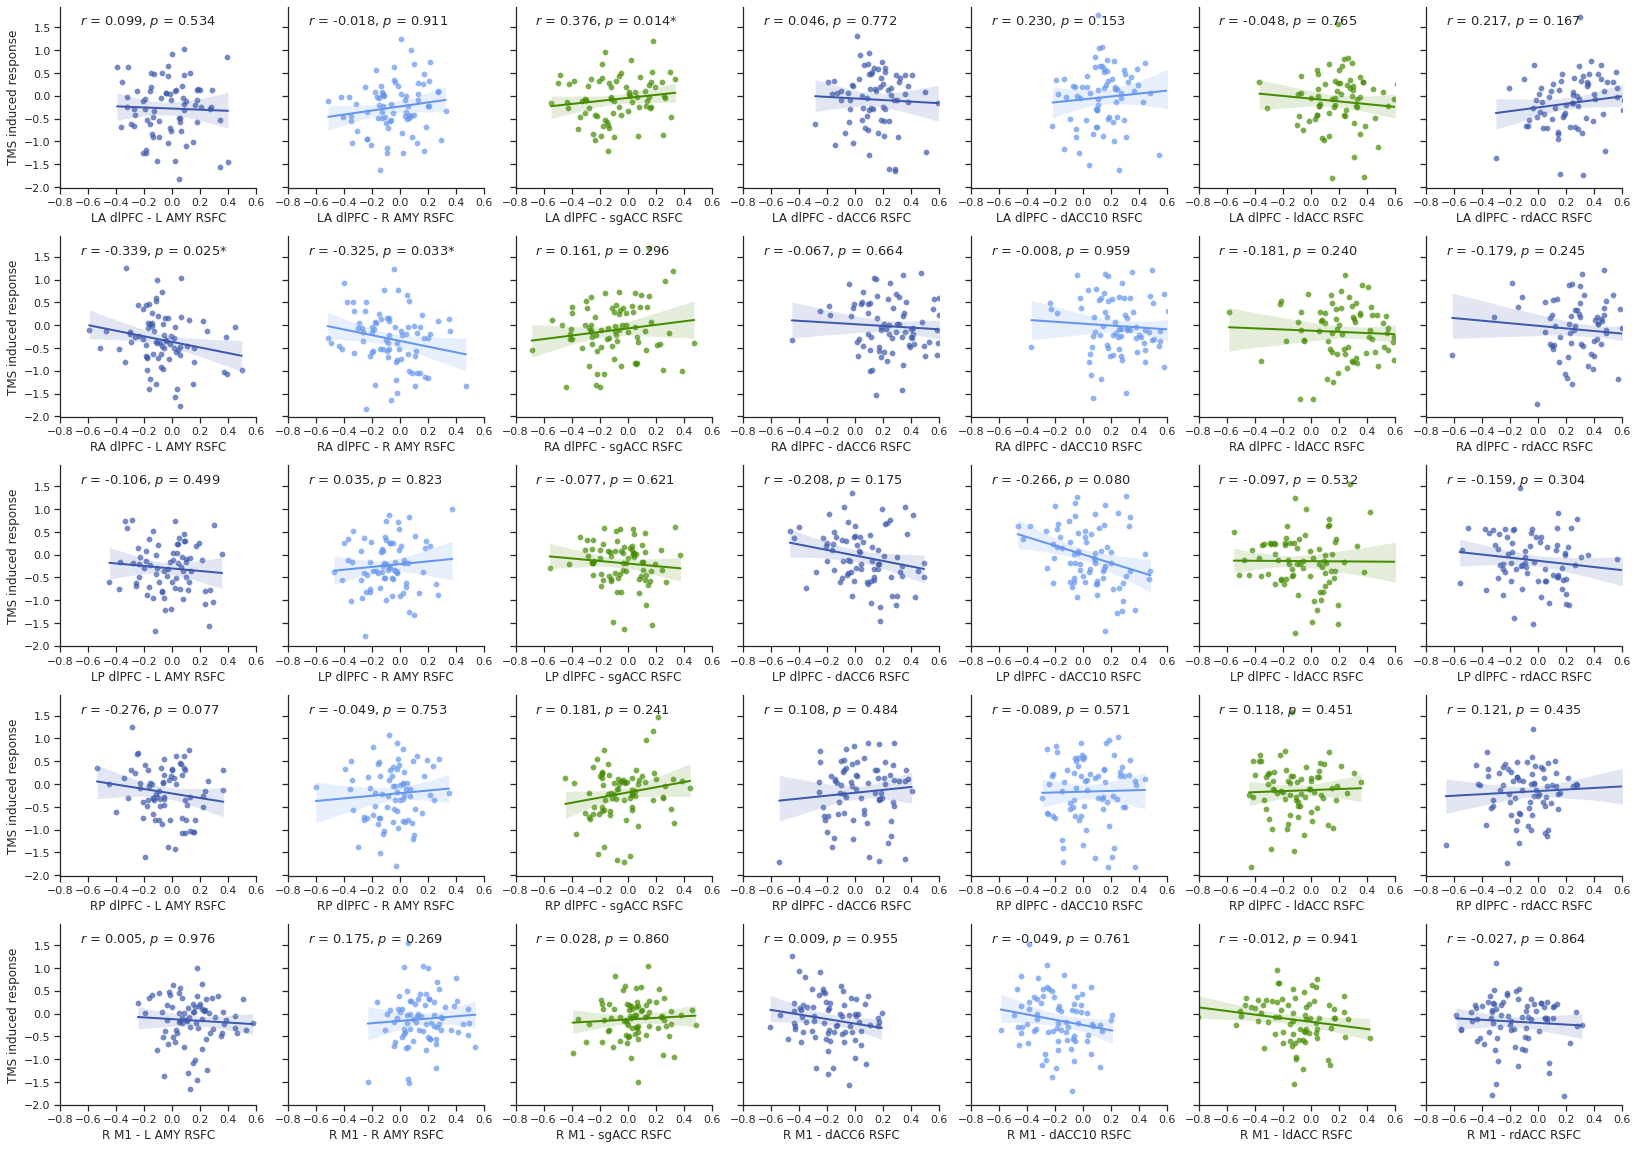

In [86]:
# sns.set_style(style='white')
sns.set_style("ticks")

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']
fig = scatter_plot(plot_data_all, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]

for row in range(len(x_label_list)):    
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')
    fig.axes[row, 3].set(xlabel = x_label_list[row] + ' - dACC6 RSFC', title = '')
    fig.axes[row, 4].set(xlabel = x_label_list[row] + ' - dACC10 RSFC', title = '')
    fig.axes[row, 5].set(xlabel = x_label_list[row] + ' - ldACC RSFC', title = '')
    fig.axes[row, 6].set(xlabel = x_label_list[row] + ' - rdACC RSFC', title = '')


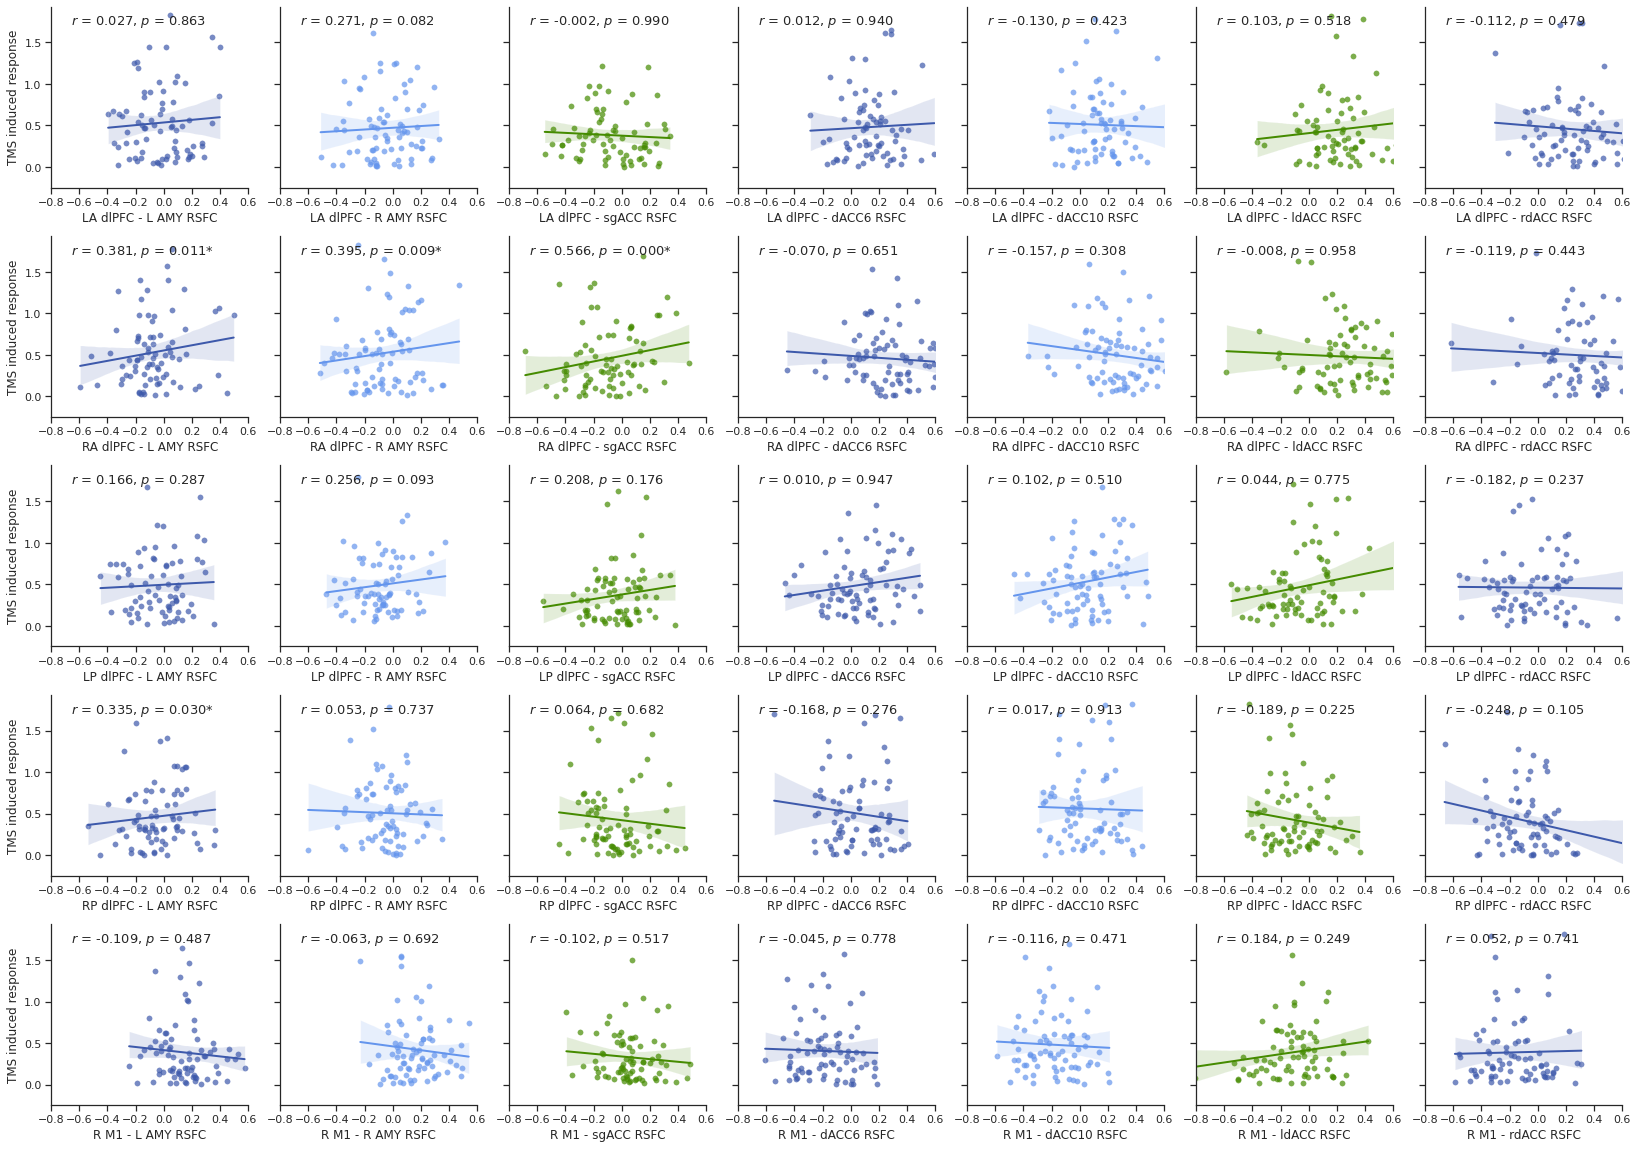

In [87]:
## show absolute connectivities:

# sns.set_style(style='white')
sns.set_style("ticks")

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']

plot_data_all_abs = plot_data_all.copy()
plot_data_all_abs['mean_response'] = abs(plot_data_all['mean_response'])
fig = scatter_plot(plot_data_all_abs, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]

for row in range(len(x_label_list)):
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')
    fig.axes[row, 3].set(xlabel = x_label_list[row] + ' - dACC6 RSFC', title = '')
    fig.axes[row, 4].set(xlabel = x_label_list[row] + ' - dACC10 RSFC', title = '')
    fig.axes[row, 5].set(xlabel = x_label_list[row] + ' - ldACC RSFC', title = '')
    fig.axes[row, 6].set(xlabel = x_label_list[row] + ' - rdACC RSFC', title = '')

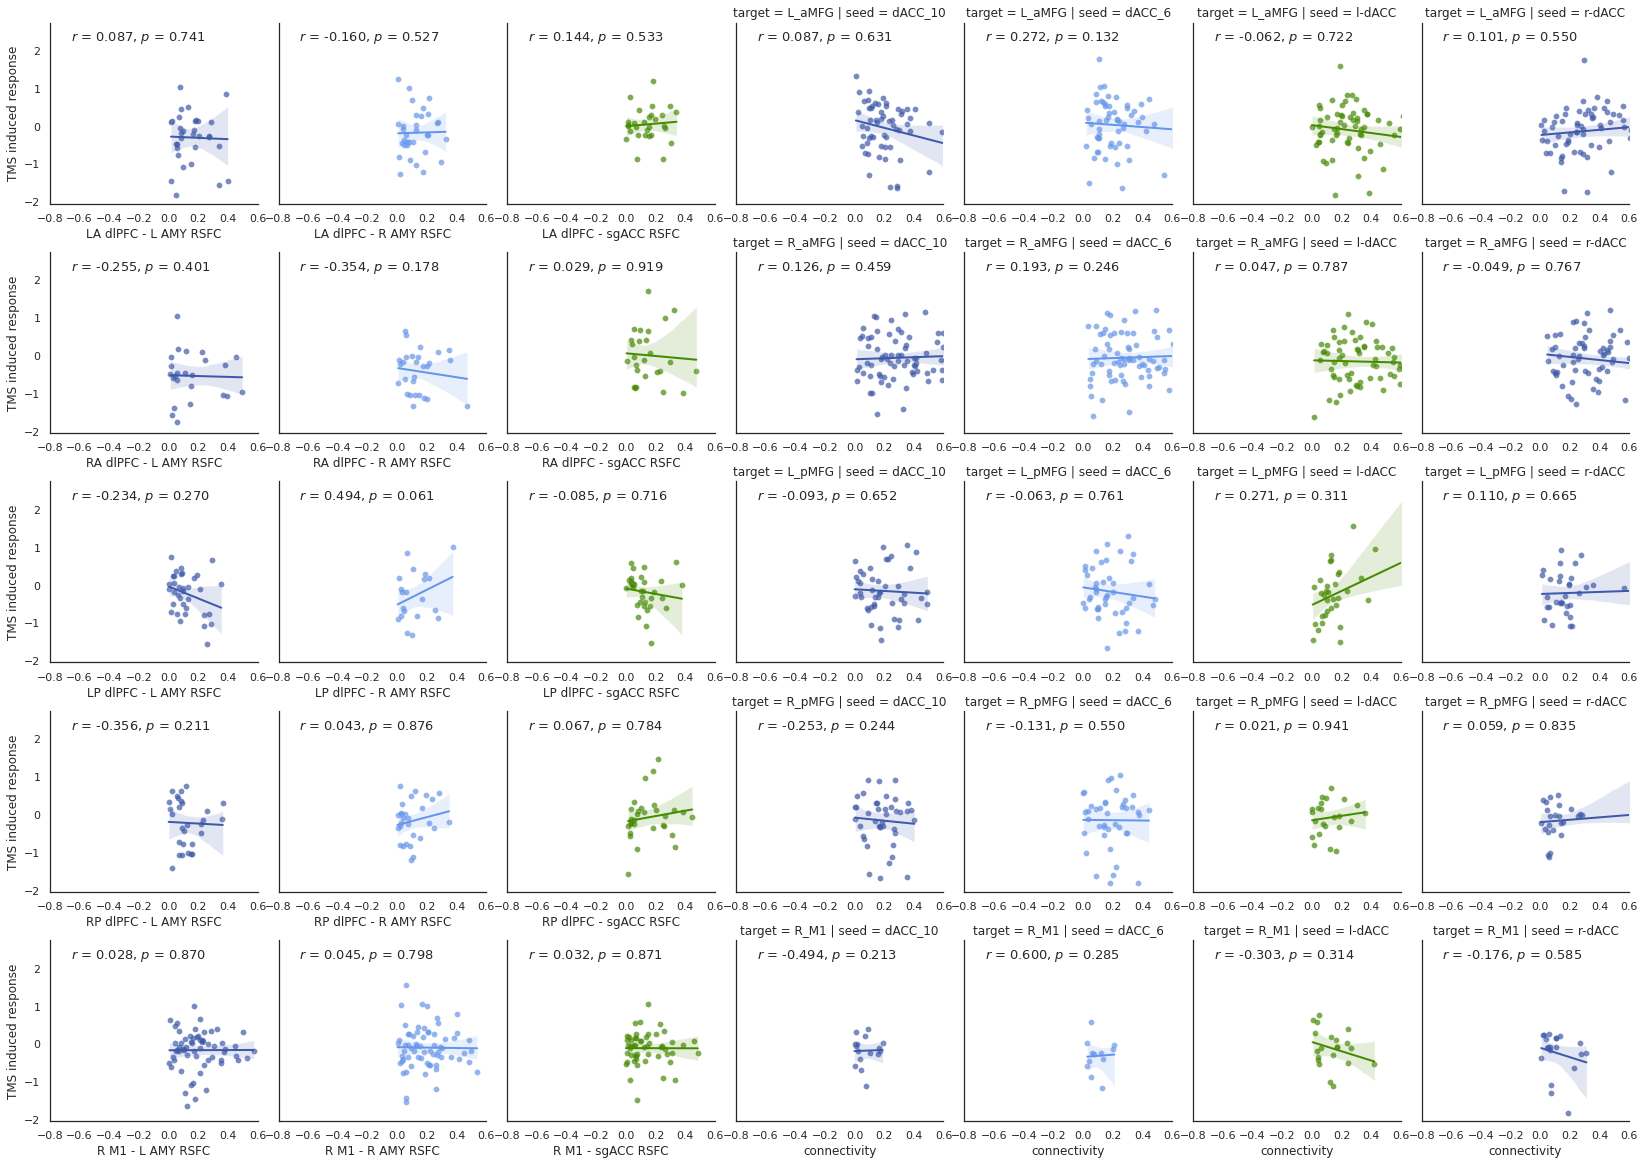

In [88]:
## show positive connectivities:

sns.set_style(style='white')

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']

plot_data_all_pos = plot_data_all.loc[plot_data_all['connectivity'] >=0, :]
fig = scatter_plot(plot_data_all_pos, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]
for row in range(len(x_label_list)):
    
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')

In [25]:
## show negative connectivities:

sns.set_style(style='white')

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']

plot_data_all_neg = plot_data_all.loc[plot_data_all['connectivity'] < 0, :]
fig = scatter_plot(plot_data_all_neg, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]
for row in range(len(x_label_list)):
    
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')

AttributeError: 'list' object has no attribute 'loc'

[Text(0.5, 33.078125, 'RA dlPFC - sgACC RSFC'), Text(0.5, 1.0, '')]

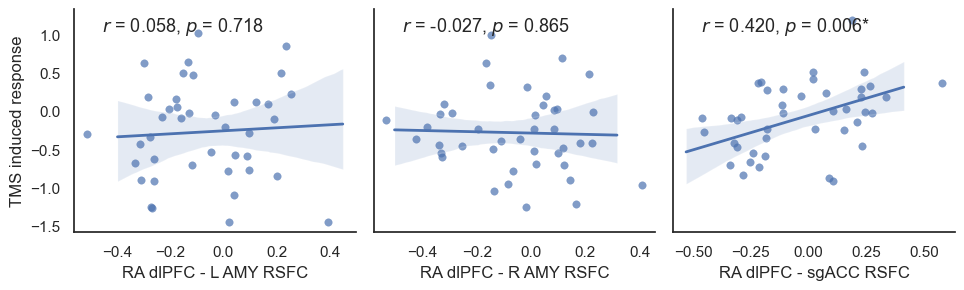

In [41]:
sns.set_style(style='white')

fig = scatter_plot(plot_data_all.loc[plot_data_all['target'] == 'L_aMFG',:], ['L_aMFG'])

fig.axes[0, 0].set(xlabel = 'RA dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'RA dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'RA dlPFC - sgACC RSFC', title = '')


[Text(0.5, 33.078125, 'RA dlPFC - sgACC RSFC'), Text(0.5, 1.0, '')]

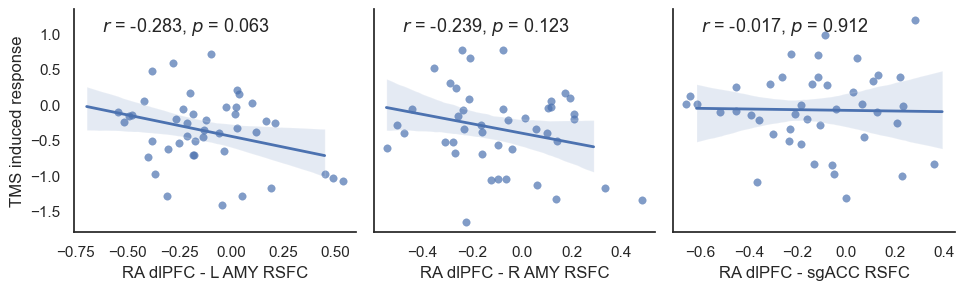

In [40]:
sns.set_style(style='white')
fig = scatter_plot(plot_data_all.loc[plot_data_all['site'] == 'R_aMFG',:], ['R_aMFG'])

fig.axes[0, 0].set(xlabel = 'RA dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'RA dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'RA dlPFC - sgACC RSFC', title = '')


[Text(0.5, 33.078125, 'RP dlPFC - sgACC RSFC'), Text(0.5, 1.0, '')]

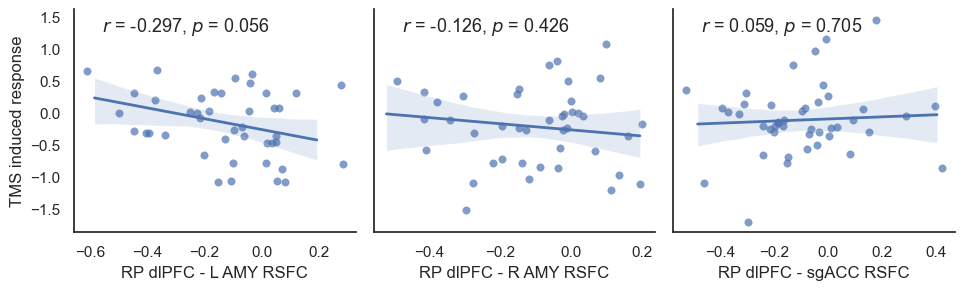

In [38]:
sns.set_style(style='white')
fig = scatter_plot(plot_data_all.loc[plot_data_all['site'] == 'R_pMFG',:], ['R_pMFG'])

fig.axes[0, 0].set(xlabel = 'RP dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'RP dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'RP dlPFC - sgACC RSFC', title = '')


[Text(0.5, 33.078125, 'LP dlPFC - sgACC RSFC'), Text(0.5, 1.0, '')]

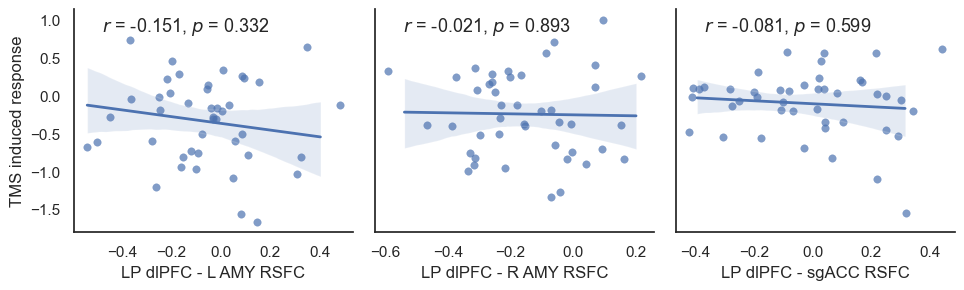

In [42]:
sns.set_style(style='white')
fig = scatter_plot(plot_data_all.loc[plot_data_all['site'] == 'L_pMFG',:], ['L_pMFG'])

fig.axes[0, 0].set(xlabel = 'LP dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'LP dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'LP dlPFC - sgACC RSFC', title = '')
